In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from pandas import factorize
%matplotlib inline

In [4]:
data = pd.read_csv('zomato_clean.csv')

In [5]:
data.head()

Index         Restaurant Name              City  \
0      0        Le Petit Souffle       Makati City   
1      1        Izakaya Kikufuji       Makati City   
2      2  Heat - Edsa Shangri-La  Mandaluyong City   
3      3                    Ooma  Mandaluyong City   
4      4             Sambo Kojin  Mandaluyong City   

                           Cuisines  Average Cost for two          Currency  \
0        French, Japanese, Desserts                  1100  Botswana Pula(P)   
1                          Japanese                  1200  Botswana Pula(P)   
2  Seafood, Asian, Filipino, Indian                  4000  Botswana Pula(P)   
3                   Japanese, Sushi                  1500  Botswana Pula(P)   
4                  Japanese, Korean                  1500  Botswana Pula(P)   

  Has Table booking Has Online delivery Is delivering now  \
0               Yes                  No                No   
1               Yes                  No                No   
2               Yes                  No                No   
3                No                  No                No   
4               Yes                  No                No   

  Switch to order menu  Price range  Aggregate rating Rating color  \
0                   No            3               4.8   Dark Green   
1                   No            3               4.5   Dark Green   
2                   No            4               4.4        Green   
3                   No            4               4.9   Dark Green   
4                   No            4               4.8   Dark Green   

  Rating text  Votes  
0   Excellent    314  
1   Excellent    591  
2   Very Good    270  
3   Excellent    365  
4   Excellent    229

Dropping the Index,Restaurant Name,City and Cuisines Columns

In [6]:
data.drop(['Index','Restaurant Name','City','Cuisines'],axis=1,inplace=True)

## 

Binary Encoding of the Has Table Booking

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9533 entries, 0 to 9532
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Average Cost for two  9533 non-null   int64  
 1   Currency              9533 non-null   object 
 2   Has Table booking     9533 non-null   object 
 3   Has Online delivery   9533 non-null   object 
 4   Is delivering now     9533 non-null   object 
 5   Switch to order menu  9533 non-null   object 
 6   Price range           9533 non-null   int64  
 7   Aggregate rating      9533 non-null   float64
 8   Rating color          9533 non-null   object 
 9   Rating text           9533 non-null   object 
 10  Votes                 9533 non-null   int64  
dtypes: float64(1), int64(3), object(7)
memory usage: 819.4+ KB


In [8]:
data['Has Table booking'] = data['Has Table booking'].map({'Yes':1,'No':0})

In [9]:
data['Has Online delivery'] = data['Has Online delivery'].map({'Yes':1,'No':0})

In [10]:
data['Is delivering now'] = data['Is delivering now'].map({'Yes':1,'No':0})

In [11]:
data['Switch to order menu'] = data['Switch to order menu'].map({'Yes':1,'No':0})

In [12]:
data.head()

Average Cost for two          Currency  Has Table booking  \
0                  1100  Botswana Pula(P)                  1   
1                  1200  Botswana Pula(P)                  1   
2                  4000  Botswana Pula(P)                  1   
3                  1500  Botswana Pula(P)                  0   
4                  1500  Botswana Pula(P)                  1   

   Has Online delivery  Is delivering now  Switch to order menu  Price range  \
0                    0                  0                     0            3   
1                    0                  0                     0            3   
2                    0                  0                     0            4   
3                    0                  0                     0            4   
4                    0                  0                     0            4   

   Aggregate rating Rating color Rating text  Votes  
0               4.8   Dark Green   Excellent    314  
1               4.5   Dark Green   Excellent    591  
2               4.4        Green   Very Good    270  
3               4.9   Dark Green   Excellent    365  
4               4.8   Dark Green   Excellent    229

Label or Odinal Encoding

In [13]:
data['Rating color'].unique()

array(['Dark Green', 'Green', 'Yellow', 'Orange', 'White', 'Red'],
      dtype=object)

In [14]:
data['Rating color'] = data['Rating color'].map({'White':1,'Orange':2,'Yellow':3,'Red':4,'Dark Green':5})

In [15]:
data['Rating text'] = data['Rating text'].map({'Excellent':1,'Very Good':2,'Good':3,'Average':4,'Poor':5,'Not rated':6})

In [16]:
data['Currency'].unique()

array(['Botswana Pula(P)', 'Brazilian Real(R$)', 'Dollar($)',
       'Emirati Diram(AED)', 'Indian Rupees(Rs.)',
       'Indonesian Rupiah(IDR)', 'NewZealand($)', 'Pounds(\x8c£)',
       'Qatari Rial(QR)', 'Rand(R)', 'Sri Lankan Rupee(LKR)',
       'Turkish Lira(TL)'], dtype=object)

<Axes: >

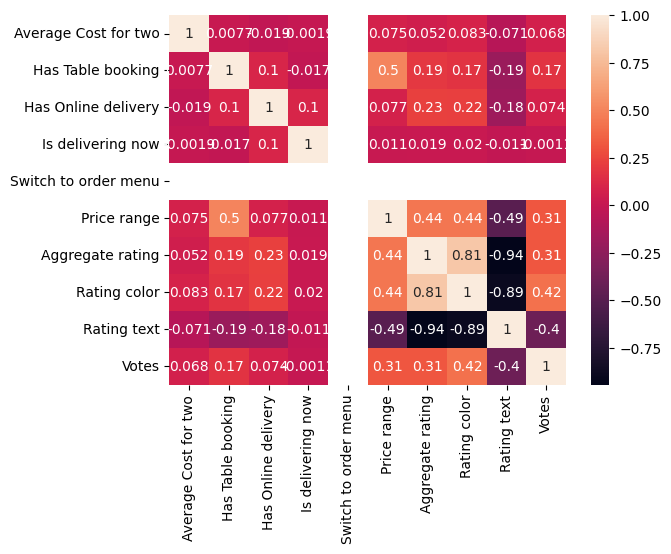

In [17]:
sns.heatmap(data.corr(numeric_only=True),annot=True)

Checking the coorelation between the input categorical column Currency and the output column Votes

In [18]:
labels, categories = factorize(data['Currency'])
data['labels'] = labels
abs(data['Votes'].corr(data['labels']))*100

2.7542932723806692

Since the corrleation is very week we can drop the currecy column

In [19]:
data.drop(['Currency','labels'],axis=1,inplace=True)

In [20]:
data.head()

Average Cost for two  Has Table booking  Has Online delivery  \
0                  1100                  1                    0   
1                  1200                  1                    0   
2                  4000                  1                    0   
3                  1500                  0                    0   
4                  1500                  1                    0   

   Is delivering now  Switch to order menu  Price range  Aggregate rating  \
0                  0                     0            3               4.8   
1                  0                     0            3               4.5   
2                  0                     0            4               4.4   
3                  0                     0            4               4.9   
4                  0                     0            4               4.8   

   Rating color  Rating text  Votes  
0           5.0            1    314  
1           5.0            1    591  
2           NaN            2    270  
3           5.0            1    365  
4           5.0            1    229

In [21]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9533 entries, 0 to 9532
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Average Cost for two  9533 non-null   int64  
 1   Has Table booking     9533 non-null   int64  
 2   Has Online delivery   9533 non-null   int64  
 3   Is delivering now     9533 non-null   int64  
 4   Switch to order menu  9533 non-null   int64  
 5   Price range           9533 non-null   int64  
 6   Aggregate rating      9533 non-null   float64
 7   Rating color          8457 non-null   float64
 8   Rating text           9533 non-null   int64  
 9   Votes                 9533 non-null   int64  
dtypes: float64(2), int64(8)
memory usage: 744.9 KB


Filling the missing values in Rating color column with median

In [22]:
data['Rating color']=data['Rating color'].fillna(value=data['Rating color'].median())

In [23]:
for i in data.columns :
    print("Number of missing values in {} is {}".format(i,data[i].isnull().sum()))

Number of missing values in Average Cost for two is 0
Number of missing values in Has Table booking is 0
Number of missing values in Has Online delivery is 0
Number of missing values in Is delivering now is 0
Number of missing values in Switch to order menu is 0
Number of missing values in Price range is 0
Number of missing values in Aggregate rating is 0
Number of missing values in Rating color is 0
Number of missing values in Rating text is 0
Number of missing values in Votes is 0


Splitting the data in the input and output features

In [24]:
X = data.drop('Votes',axis=1)
y = data['Votes']

Performing the Standard Scaler

In [25]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [26]:
scaler.fit_transform(X)

c:\Users\gupta\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:757: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
c:\Users\gupta\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:595: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
c:\Users\gupta\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:604: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
c:\Users\gupta\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:757: FutureWarning:

array([[-6.28894650e-03,  2.68929304e+00, -5.88293018e-01, ...,
         1.40795370e+00,  3.23249661e+00, -2.14308474e+00],
       [-9.14188956e-05,  2.68929304e+00, -5.88293018e-01, ...,
         1.21017935e+00,  3.23249661e+00, -2.14308474e+00],
       [ 1.73439354e-01,  2.68929304e+00, -5.88293018e-01, ...,
         1.14425456e+00, -1.43422560e-01, -1.41182170e+00],
       ...,
       [-6.39259532e-02, -3.71844936e-01, -5.88293018e-01, ...,
         6.82781062e-01,  9.81883831e-01, -6.80558659e-01],
       [-6.70247170e-02, -3.71844936e-01, -5.88293018e-01, ...,
         8.80555419e-01, -1.43422560e-01, -1.41182170e+00],
       [-7.10531100e-02, -3.71844936e-01, -5.88293018e-01, ...,
         8.80555419e-01, -1.43422560e-01, -1.41182170e+00]])

Splliting the data into train and test split

In [27]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.33,random_state=42)

Importing the necessary library for the algorithim

In [28]:
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from xgboost import XGBRegressor

Creating the dictionary of all the regression algorithimns 

In [29]:
algo_dict={
    'LinearRegressor':LinearRegression(),
    'SupportVector' :SVR(),
    'DecisionTree' :DecisionTreeRegressor(),
    'RandomForest' :RandomForestRegressor(),
    'AdaBoost': AdaBoostRegressor(),
    'Xgboost':XGBRegressor()
}

Fitting all the models on the machine learning algorithim

In [33]:
for i in algo_dict :
    model = algo_dict.get(i)
    model.fit(X_train,y_train)

c:\Users\gupta\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:757: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
c:\Users\gupta\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:595: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
c:\Users\gupta\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:604: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
c:\Users\gupta\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:757: FutureWarning:

Predicting all the models output with the help of machine learning algorithims

In [34]:
for i in algo_dict :
    model = algo_dict.get(i)
    print("The prediction of the {} model is {}".format(i,model.predict(X_test)))

c:\Users\gupta\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:757: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
c:\Users\gupta\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:595: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
c:\Users\gupta\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:604: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
c:\Users\gupta\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:757: FutureWarning:

The prediction of the LinearRegressor model is [-22.83035491  90.70740359 473.72752096 ... 342.21144809 365.31967768
 -36.25695668]
The prediction of the SupportVector model is [26.91116194 30.403495   28.21577046 ... 34.81807855 28.65199366
 26.91083852]
The prediction of the DecisionTree model is [ 16.11111111  31.91666667 258.         ... 100.         560.5
   0.784     ]
The prediction of the RandomForest model is [ 16.54730386  31.95160903 408.76333333 ... 107.90828571 536.22566667
   0.78204151]
The prediction of the AdaBoost model is [  47.21282051   47.21282051  547.02282158 ... 1019.24186704  547.02282158
   47.21282051]
The prediction of the Xgboost model is [ 18.040535   49.608036  289.83786   ... 342.09515   647.74115
  -1.1820523]


c:\Users\gupta\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:757: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
c:\Users\gupta\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:595: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
c:\Users\gupta\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:604: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
c:\Users\gupta\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:757: FutureWarning:

Checking the performance of all the regression algorithim using r2 score

In [35]:
from sklearn.metrics import r2_score
for i in algo_dict :
    model = algo_dict.get(i)
    pred_model = model.predict(X_test)
    print("The accuracy score of the {} model is {}".format(i,r2_score(pred_model,y_test)))


c:\Users\gupta\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:757: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
c:\Users\gupta\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:595: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
c:\Users\gupta\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:604: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
c:\Users\gupta\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:757: FutureWarning:

The accuracy score of the LinearRegressor model is -1.842749110813461
The accuracy score of the SupportVector model is -6040.602676387734
The accuracy score of the DecisionTree model is -0.20725652759209656
The accuracy score of the RandomForest model is -0.5682948188544703
The accuracy score of the AdaBoost model is -0.02400283380255197
The accuracy score of the Xgboost model is -0.34175933388864244


c:\Users\gupta\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:757: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
c:\Users\gupta\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:595: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
c:\Users\gupta\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:604: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
c:\Users\gupta\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:757: FutureWarning:

In [30]:
# for i in algo_dict :
#     model = algo_dict.get(i)
#     model.predict(X_train)


In [31]:
dict={
    'a':1,
    'b':2,
    'c':3,
    'd':4
}


In [32]:
for i in dict :
    val = dict.get(i)
    print("The value against the {} is {}".format(i,val))

The value against the a is 1
The value against the b is 2
The value against the c is 3
The value against the d is 4
